In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append("C:/Users/kostyad/Documents/seisplot")

In [2]:
from obspy.io.segy.segy import _read_segy

stream = _read_segy('data/31_81_PR.sgy')
print (stream.traces[0].data)

[ 0.  0.  0. ...,  0.  0.  0.]


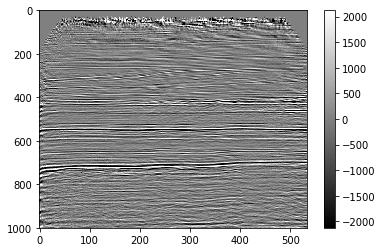

In [3]:
data = np.stack(t.data for t in stream.traces)
data = data[:1000,:1000]
#plt.imshow(data)

from seismic import Seismic
s = Seismic.plot_2D_static(data)

In [4]:
from seismic import Seismic
s = Seismic.from_segy('data/31_81_PR.sgy')

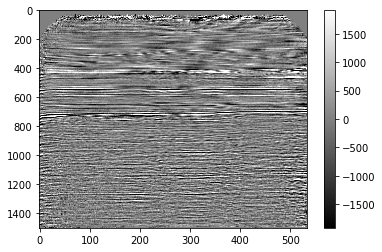

In [5]:
s.plot ()

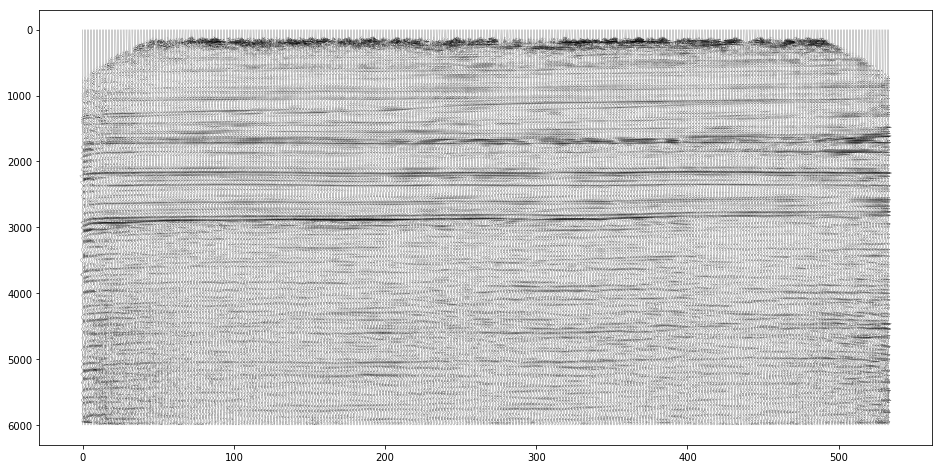

In [6]:
s.wiggle_plot()

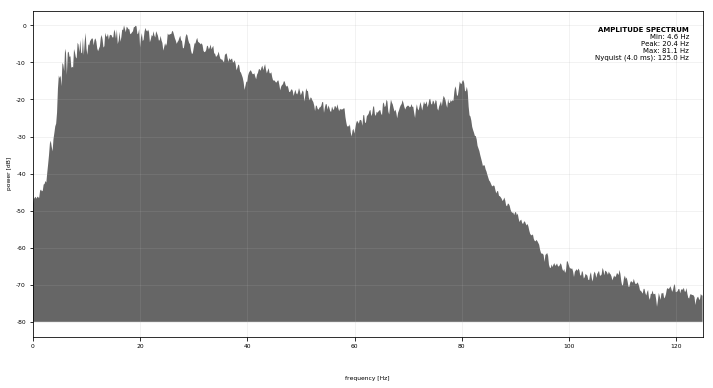

In [7]:
s.plot_spectrum()

In [8]:
data = s.get_data()
fs = 1. / s.dt

spec_matrix = []
db_matrix = []
for i in range(len(data)):
    f, a, f_min, f_max = s.spectrum(data[i], fs, False)
    spec_matrix.append (a)
    db = 20 * np.log10(a)        
    db_matrix.append (db)
    
spec_matrix = np.array(spec_matrix)
db_matrix = db_matrix - np.amax(db_matrix)

How to remove decorations from matplotlib:
https://stackoverflow.com/questions/38411226/matplotlib-get-clean-plot-remove-all-decorations

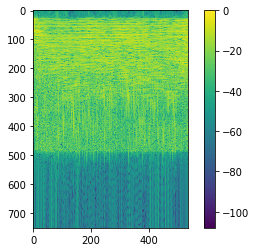

In [9]:
#fig, ax = plt.subplots()
#ax.set_axis_off()

plt.imshow(db_matrix.T)
plt.colorbar()

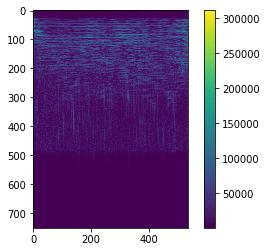

In [10]:
#fig, ax = plt.subplots()
#ax.set_axis_off()

plt.imshow(spec_matrix.T)
plt.colorbar()  

FK

In [11]:
data = s.get_data()
#data = data*np.blackman(len(data[0]))
data = data.T
freq = np.fft.fft2(data)
freq = np.fft.fftshift(freq)

freq = freq[int(len(freq)/2):,:]
freq = np.abs(freq)
freq = 20 * np.log10(freq)
freq = freq - np.amax(freq)

In [12]:
#fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 6))
#ax[0,0].hist(freq.ravel(), bins=100)
#ax[0,0].set_title('hist(freq)')
#ax[0,1].hist(np.log(freq).ravel(), bins=100)
#ax[0,1].set_title('hist(log(freq))')
#ax[1,0].imshow(np.log(freq), interpolation="none")
#ax[1,0].set_title('log(freq)')
#ax[1,1].imshow(data, interpolation="none")
#plt.show()

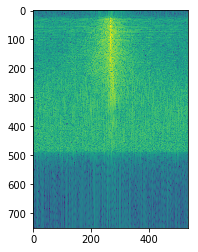

In [13]:
plt.imshow(freq)